In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
βo = 0.2
βinf = 0.01
T = 20
tau = 5


def beta_fn(t, n):
    # The arguments of this function are "t" -- the current simulation day,

    # and "n" the current geo node.

    # This formuluation allows us to vary the parameter over time and geo node.
    if 0 <= t <= T:
        return βo

    elif t > T:
        return βinf + (βo - βinf) * math.exp(-(t - T) / tau)

    return None

In [ ]:
# Generating initial particle cloud
# initial infected
i_inf = 5
total_population = 100_000
# initial_particle cloud
initial_particle_cloud = np.array(
    [[total_population - i_inf - i_inf, i_inf, i_inf, 0]], dtype=np.int64
)

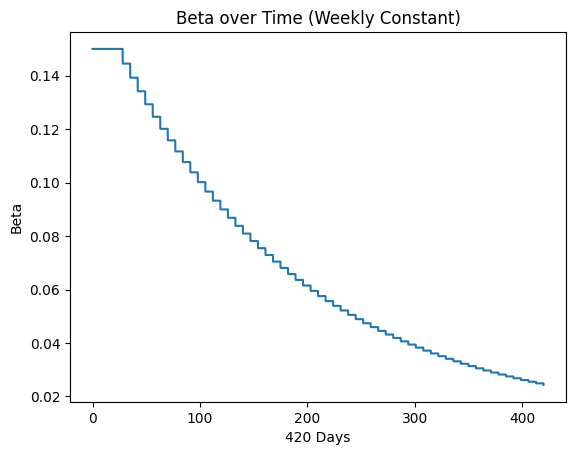

In [ ]:
import numpy as np

beta_par = {"beta_0": 0.15, "beta_inf": 0.01, "T": 21, "tau": 25}  # hyperparameters
# beta_par = {'beta_0':0.08,'beta_inf':0.005,'T':21,'tau':25}

n_days = 7


def beta_fn(t, n):
    week = t // n_days  # Convert time to weeks (integer division)

    if week < beta_par["T"] // n_days:
        return beta_par["beta_0"]

    return beta_par["beta_inf"] + (beta_par["beta_0"] - beta_par["beta_inf"]) * np.exp(
        -(week - beta_par["T"] // n_days) / beta_par["tau"]
    )


# Generate beta values for 100 weeks
beta_ts = np.linspace(0, 420, 420000)  # Time values in days

betas = []
for i in range(np.shape(beta_ts)[0]):
    betas.append(beta_fn(beta_ts[i], beta_par))

plt.plot(beta_ts, np.array(betas))
plt.xlabel(f"{int(beta_ts.shape[0]/1000)} Days")
plt.ylabel("Beta")
plt.title("Beta over Time (Weekly Constant)")
plt.show()

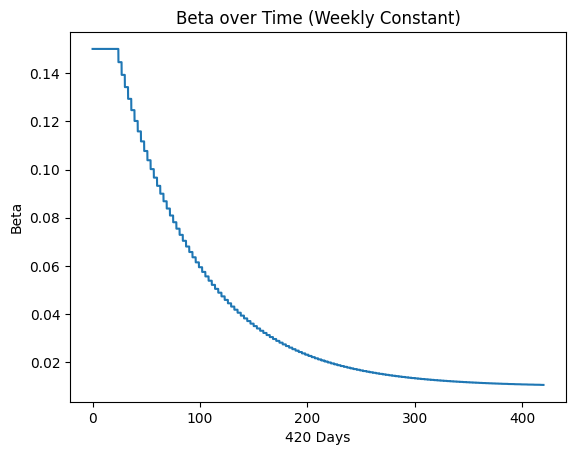

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

beta_par = {"beta_0": 0.15, "beta_inf": 0.01, "T": 21, "tau": 25}  # hyperparameters
# beta_par = {'beta_0':0.08,'beta_inf':0.005,'T':21,'tau':25}

n_days = 3


def beta_fn(t, n):
    week = t // n_days  # Convert time to weeks (integer division)

    if week < beta_par["T"] // n_days:
        return beta_par["beta_0"]

    return beta_par["beta_inf"] + (beta_par["beta_0"] - beta_par["beta_inf"]) * np.exp(
        -(week - beta_par["T"] // n_days) / beta_par["tau"]
    )


# Generate beta values for 100 weeks
beta_ts = np.linspace(0, 420, 420000)  # Time values in days

betas = []
for i in range(np.shape(beta_ts)[0]):
    betas.append(beta_fn(beta_ts[i], beta_par))

plt.plot(beta_ts, np.array(betas))
plt.xlabel(f"{int(beta_ts.shape[0]/1000)} Days")
plt.ylabel("Beta")
plt.title("Beta over Time (Weekly Constant)")
plt.show()

In [31]:
beta_ts.shape[0] / 1000

420.0

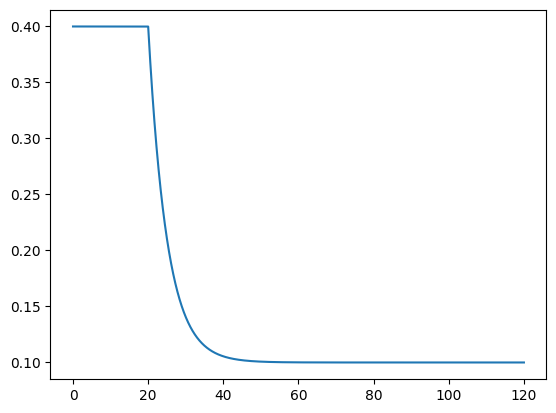

In [60]:
"""Functional beta"""


def beta_fn(t, n):
    if t < beta_par["T"]:
        return beta_par["beta_0"]

    return beta_par["beta_inf"] + (beta_par["beta_0"] - beta_par["beta_inf"]) * np.exp(
        -(t - beta_par["T"]) / beta_par["tau"]
    )


beta_par = {"beta_0": 0.4, "beta_inf": 0.1, "T": 20, "tau": 5}
beta_ts = np.linspace(0, 120, 120000)

betas = []
for i in range(np.shape(beta_ts)[0]):
    betas.append(beta_fn(beta_ts[i], beta_par))

plt.plot(beta_ts, np.array(betas))

In [ ]:
from functools import partial

from epymorph import *
from epymorph.initializer import explicit

# Note: the 'library' dictionaries contain functions which load the named component,
# so you have to apply the function to get the _actual_ component.

# The 'pei' model family (IPM/MM/GEO) implement an SIRS model in 6 US states.
# (But keep in mind: it is possible to mix-and-match the models.)
sim = StandardSimulation(
    geo=geo_library["single_pop"](),
    ipm=ipm_library["seir"](),
    mm=mm_library["no"](),
    params={
        "beta": beta_fn,
        "eta": 1 / 7,
        "gamma": 1 / 14,
        "q": 0.1,
        "µ": 0.004,
        # 'theta': 0.1,
        # 'move_control': 0.9
        # 'commuters': geo['commuters']
    },
    time_frame=TimeFrame.of("2015-01-01", 120),
    initializer=partial(explicit, initials=initial_particle_cloud),
    # initializer=partial(single_location, location=0, seed_size=5),
    # I've provided a seeded RNG here just to keep this notebook's results consistent,
    # but the rng param is optional! If not given, a new RNG is constructed for each run
    # using numpy's default_rng.
    rng=default_rng(1),
)

In [ ]:
next_initials = initial_particle_cloud
initializer = partial(explicit, initials=initial_particle_cloud)
outs = []
e = []
with sim_messaging(sim):
    for week in range(20):
        sim.update_config(
            new_initializer=initializer, time_frame=TimeFrame.of("2015-01-01", 7)
        )
        out = sim.run()
        outs.append(out)
        next_initials = out.prevalence[-1]
        e.append(out.prevalence[-1][:, 1].tolist()[0])
        initializer = partial(explicit, initials=next_initials)

total_prevalence = np.concatenate([o.prevalence for o in outs], axis=0)
total_incidence = np.concatenate([o.incidence_per_day for o in outs], axis=0)

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.001s
|####################| 100% 
Runtime: 0.001s
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.002s
|####################| 100% 
Runtime: 0.002s
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.002s
|####################| 100% 
Runtime: 0.002s
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
Running simulation (StandardSimulation):
• 2015-01-01 to 2015-01-08 (7 days)
• 1 geo nodes
|#

[   1    1    0    0    2    2    4    3    1    2    6    8    5   14
    9   11   21   15   21   21   40   36   44   66   72   94   89  122
  130  158  211  240  300  314  409  455  538  672  763  880 1020 1183
 1275 1432 1652 1778 1916 2054 2186 2182 2231 2320 2271 2217 2154 2090
 1900 1783 1720 1563 1429 1310 1214 1041  939  889  781  696  629  579
  479  429  414  359  319  290  239  220  199  200  171  166  124  119
  112  102  107   91   91   64   63   61   56   62   52   54   35   36
   45   30   33   29   31   22   19   28   17   17   13   20   13   12
   15   11   11   11    6   12   10    6    7    5    9    3    2    3
    2    7    2    2    4    3    6    3    1    1    2    3    3    3]


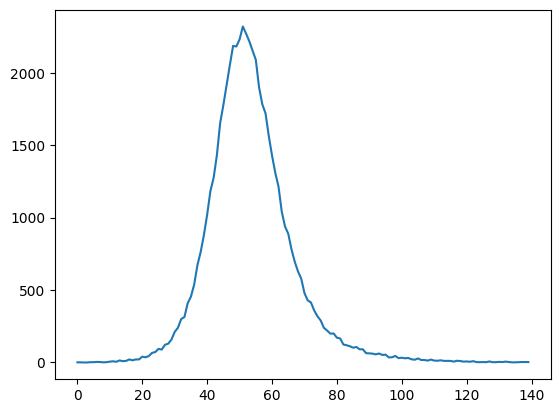

In [139]:
s_to_i = total_incidence[:, 0, 1]
print(s_to_i)

plt.plot(s_to_i)

In [161]:
out.prevalence[-1][:, 1].tolist()[0]

7

In [137]:
total_prevalence.shape

(140, 1, 4)

In [62]:
with sim_messaging(sim):
    out = sim.run()

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-01 (120 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.024s


In [63]:
cases = 1 / 7 * out.prevalence[:, :, 1].flatten()
cases = cases.astype(int)
cases

array([ 0,  0,  1,  1,  2,  2,  2,  3,  2,  2,  3,  4,  5,  6,  7,  8, 10,
       12, 15, 21, 24, 30, 34, 31, 32, 32, 31, 28, 28, 28, 26, 23, 19, 18,
       17, 14, 11, 11, 10,  9,  8,  8,  8,  9,  8,  7,  7,  6,  5,  4,  4,
        4,  4,  4,  5,  4,  3,  3,  2,  3,  3,  3,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [50]:
weekly_cases = cases[::3]
weekly_cases

array([ 0,  0,  0,  0,  0,  1,  1,  2,  4,  5,  6,  8, 10, 12, 15, 17, 21,
       24, 27, 32, 36, 40, 45, 49, 55, 60, 65, 70, 74, 76, 78, 78, 79, 81,
       81, 80, 81, 81, 80, 81, 80, 78, 76, 75, 73, 73, 69, 66, 63, 60, 56,
       53, 50, 48, 44, 42, 38, 35, 33, 32, 29, 27, 25, 23, 21, 20, 18, 16,
       16, 15, 14, 13, 12, 11, 10, 10,  9,  8,  8,  7,  6,  6,  5,  5,  5,
        4,  4,  4,  3,  3,  3,  3,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [41]:
# Convert daily values to weekly sums
weekly_cases = np.sum(cases.reshape(-1, 3), axis=1)
# B_vector = weekly_B_vector
print(weekly_cases)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 3 3 3 3 4 5 6 5 6 8 8 9 8 8 8 8 7
 9 7 8 8 6 6 6 7 6 6 6 5 6 4 3 4 4 4 3 3 3 3 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [51]:
rng = np.random.default_rng()

sim_data = rng.poisson(weekly_cases)
sim_data

array([ 0,  0,  0,  0,  0,  2,  1,  2,  6,  7,  5, 11,  4, 13, 12, 26, 17,
       21, 28, 31, 33, 44, 42, 47, 47, 65, 75, 77, 82, 87, 78, 77, 71, 77,
       63, 62, 89, 81, 82, 94, 81, 90, 91, 74, 74, 86, 68, 67, 55, 64, 53,
       70, 61, 55, 41, 37, 42, 32, 34, 25, 33, 29, 31, 23, 21, 18, 17, 22,
       13, 15, 14, 12,  9, 16, 12, 10, 10,  7,  5,  9,  5,  4,  7, 11,  6,
        6,  2,  5,  4,  5,  2,  2,  4,  3,  4,  2,  0,  0,  1,  1,  1,  2,
        1,  0,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [64]:
cases = 1 / 7 * out.prevalence[:, :, 1].flatten()
rng = np.random.default_rng()

sim_data = rng.poisson(cases)
sim_data

array([ 0,  2,  1,  1,  3,  6,  0,  1,  0,  2,  1,  2,  4,  4,  5,  7, 10,
       14, 15, 18, 31, 29, 26, 32, 20, 35, 42, 29, 23, 29, 25, 15, 21, 13,
       16, 17, 10, 14,  9, 15, 13,  7,  7, 10,  4,  5,  9,  5,  7,  9,  6,
        2,  5,  4, 10,  4,  2,  3,  2,  2,  1,  5,  2,  2,  2,  2,  0,  0,
        1,  1,  4,  1,  3,  1,  1,  4,  1,  3,  5,  0,  2,  3,  0,  2,  2,
        1,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  2,  0,  0,  2,  0,
        0])

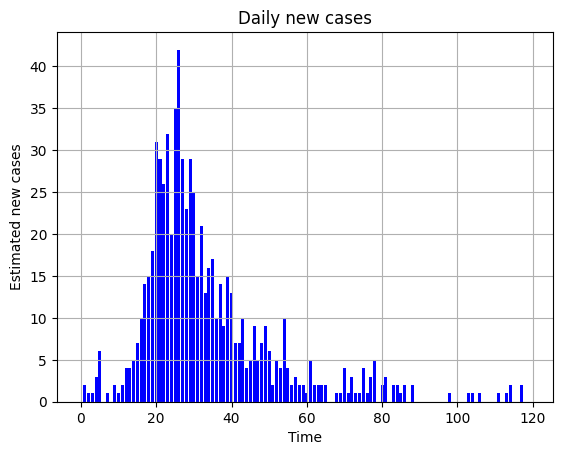

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from column index 1
values = sim_data
# values = values.astype(int)
n_days = 3
time_axis = range(len(values))

# Plot the values over time as a bar plot
plt.bar(time_axis, values, color="blue")
plt.xlabel("Time")
plt.ylabel("Estimated new cases")
plt.title("Daily new cases")
plt.grid(True)
plt.show()

In [ ]:
# Create a date range starting from 2015-01-01
start_date = pd.to_datetime("2015-01-01")
dates = pd.date_range(start=start_date, periods=len(values), freq="D")

# Create a DataFrame with dates and values
df = pd.DataFrame({"Date": dates, "Cases": values})

# Save the DataFrame to a CSV file
df.to_csv("D:/weekly_new_infections.csv", index=False)

# Print the first few rows to verify
print(df.head())

        Date  Cases
0 2015-01-01      0
1 2015-01-02      2
2 2015-01-03      1
3 2015-01-04      1
4 2015-01-05      3


In [ ]:
import numpy as np
import pandas as pd

# Assuming `values` is a list or array-like containing your data
# Create a date range starting from 2015-01-01
start_date = pd.to_datetime("2015-01-01")
dates = pd.date_range(start=start_date, periods=len(values), freq="D")

# Create a DataFrame with dates and values
df = pd.DataFrame({"Date": dates, "Cases": values})

# Create a boolean mask for alternate days
mask = np.arange(len(df)) % 2 == 0

# Apply the mask to set every other day's 'Cases' to NaN
df.loc[mask, "Cases"] = np.nan

# Save the DataFrame to a CSV file
df.to_csv("D:/weekly_missing_estimated_new_infections.csv", index=False)

# Print the first few rows to verify
print(df.head())

        Date  Cases
0 2015-01-01    NaN
1 2015-01-02    2.0
2 2015-01-03    NaN
3 2015-01-04    1.0
4 2015-01-05    NaN


In [4]:
import numpy as np

np.arange(5) % 2 == 0

array([ True, False,  True, False,  True])

In [177]:
print(total_prevalence[-1])
out.prevalence[-1]

[[13975     7   222 85796]]


array([[98831,     0,     4,  1165]])

In [210]:
np.sum(out.incidence_per_day, axis=0)

array([[1159,  806,  358,  807]])

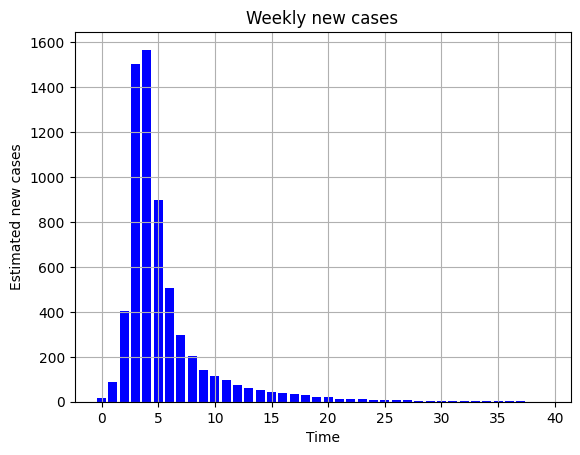

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from column index 1
values = cases[::7]
# values = values.astype(int)

time_axis = range(len(values))

# Plot the values over time as a bar plot
plt.bar(time_axis, values, color="blue")
plt.xlabel("Time")
plt.ylabel("Estimated new cases")
plt.title("Weekly new cases")
plt.grid(True)
plt.show()

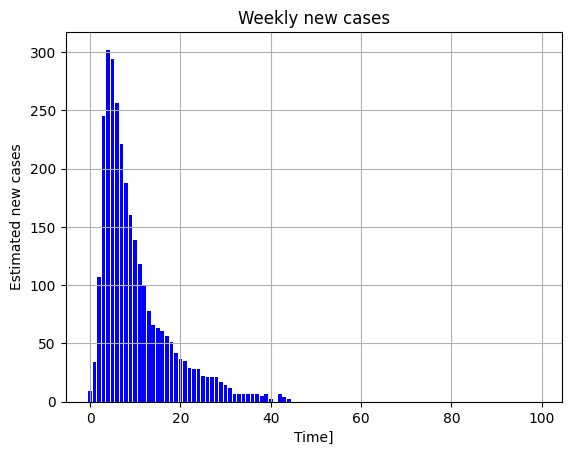

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from column index 1
values = weekly_cases
# values = values.astype(int)

time_axis = range(len(values))

# Plot the values over time as a bar plot
plt.bar(time_axis, values, color="blue")
plt.xlabel("Time]")
plt.ylabel("Estimated new cases")
plt.title("Weekly new cases")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Create a date range starting from 2015-01-01
start_date = pd.to_datetime("2015-01-01")
dates = pd.date_range(start=start_date, periods=len(values), freq="W")

# Create a DataFrame with dates and values
df = pd.DataFrame({"Date": dates, "Cases": values})

# Save the DataFrame to a CSV file
df.to_csv("D:/weekly_esimated_new_infections.csv", index=False)

# Print the first few rows to verify
print(df.head())

        Date  Cases
0 2015-01-04      9
1 2015-01-11     34
2 2015-01-18    107
3 2015-01-25    245
4 2015-02-01    302


In [163]:
e

[15,
 81,
 279,
 959,
 3271,
 9062,
 15459,
 13473,
 7413,
 3439,
 1602,
 826,
 458,
 269,
 157,
 77,
 42,
 30,
 15,
 7]

In [179]:
cases = []

for i in range(20):
    out = sim.run()

    cases.append(np.sum(out.incidence, axis=0))

    particle_state = out.prevalence[-1]

    initializer = partial(explicit, initials=particle_state)
    # time_frame = TimeFrame.of(date, duration)

    sim.update_config(new_initializer=initializer)

In [19]:
n_cases = np.array(cases)
n_cases[:, :, 1].flatten()

array([  260,  1338,  6461, 20041, 27850, 18453,  8790,  4013,  1925,
        1058,   604,   396,   294,   241,   174,   148,   100,    82,
          70,    67,    58,    50,    41,    40,    26,    26,    23,
          20,     8,    16,    15,    11,    12,    11,    10,    10,
          11,    10,    11,     3,     4,     4,     4,     5,     5,
           4,     4,     4,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     0,     0,     0,
           0,     1,     0,     0,     1,     1,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0])

In [104]:
with sim_messaging(sim):
    out = sim.run()

Running simulation (StandardSimulation):
• 2015-01-01 to 2016-02-25 (420 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.067s


In [11]:
out.compartment_labels

['S', 'E', 'I', 'R']

In [105]:
out.prevalence

array([[[99988,     6,     5,     1]],

       [[99987,     6,     5,     2]],

       [[99986,     7,     5,     2]],

       ...,

       [[98831,     0,     0,  1169]],

       [[98831,     0,     0,  1169]],

       [[98831,     0,     0,  1169]]])

In [18]:
out.prevalence.tolist()[-1]

[[98681, 1, 285, 1033]]

In [60]:
out.incidence[:, :, 1].flatten()

array([ 1,  1,  0,  0,  2,  2,  4,  2,  5,  3,  4,  3,  6,  3,  6,  9,  4,
        5,  8,  8, 23, 22, 28, 62, 37, 26, 32, 38, 27, 26, 28, 29, 40, 22,
       24, 24, 25,  9,  8,  8, 14,  6,  7,  5,  9, 15,  3,  5, 10,  5,  5,
        3,  5,  2,  3,  6,  9,  5,  4,  2,  2,  3,  7,  2,  4,  1,  4,  3,
        3,  1,  2,  0,  1,  0,  0,  0,  3,  0,  1,  0,  1,  0,  5,  4,  0,
        1,  0,  3,  0,  1,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  2,  1,  0,  0,  2,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [106]:
# Reshape to (120 weeks, 7 days per week, 1, 4)
reshaped_incidence = out.prevalence.reshape(60, 7, 1, 4)

# Sum over the 7 days to get weekly totals
weekly_incidence = reshaped_incidence.sum(axis=1)

print(weekly_incidence.shape)

(60, 1, 4)


In [108]:
weekly_incidence

array([[[699846,     78,     44,     32]],

       [[699509,    193,    147,    151]],

       [[698585,    692,    321,    402]],

       [[696035,   1546,   1241,   1178]],

       [[694225,   1134,   2017,   2624]],

       [[693405,    513,   2020,   4062]],

       [[692905,    369,   1538,   5188]],

       [[692602,    223,   1143,   6032]],

       [[692381,    145,    886,   6588]],

       [[692189,    109,    632,   7070]],

       [[692076,     71,    400,   7453]],

       [[692007,     66,    273,   7654]],

       [[691958,     28,    228,   7786]],

       [[691940,     17,    163,   7880]],

       [[691915,     19,    138,   7928]],

       [[691885,     27,     92,   7996]],

       [[691845,     27,     85,   8043]],

       [[691838,     16,     69,   8077]],

       [[691830,     14,     40,   8116]],

       [[691820,     10,     28,   8142]],

       [[691817,      0,     21,   8162]],

       [[691817,      0,     13,   8170]],

       [[691817,      0,      7,

In [112]:
flux = 0.143 * weekly_incidence[:, :, 1].flatten()
# flux = sol.y[2,:]
rng = np.random.default_rng()

sim_data = rng.poisson(flux)

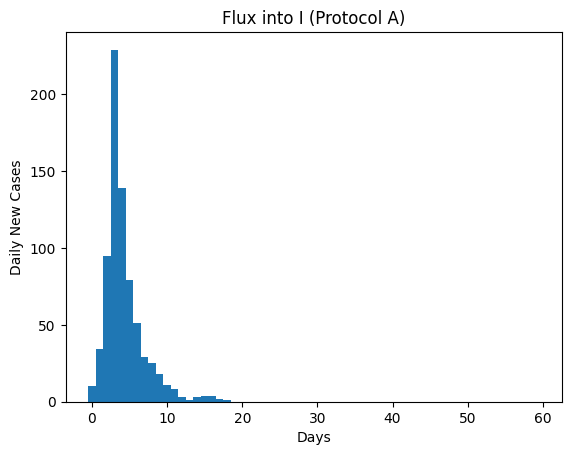

In [ ]:
plt.xlabel("Days")
plt.ylabel("Daily New Cases")
plt.title("Flux into I (Protocol A)")
plt.bar(x=np.arange(0, np.shape(flux)[0]), height=sim_data, width=1)
# plt.plot(flux,zorder=2,color='red')
plt.show()

In [84]:
out.compartment_labels, out.event_labels

(['S', 'E', 'I', 'R'], ['S → E', 'E → I', 'E → R', 'I → R'])

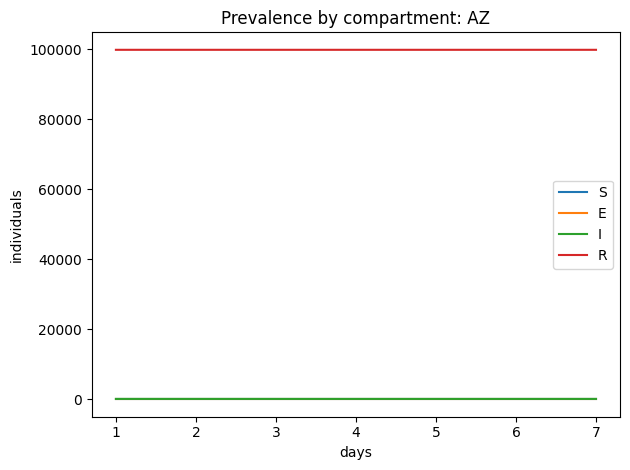

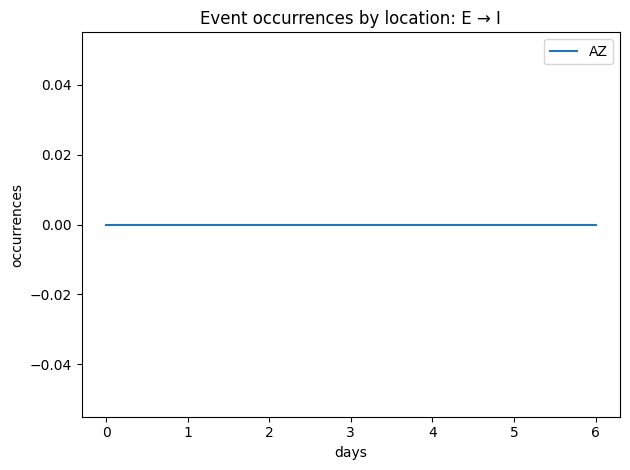

In [205]:
plot_pop(out, 0)  # prevalence for all compartments in population 0.
plot_event(out, 1)  # incidence data for the E->I event across all populations.

In [13]:
out.incidence_per_day[:, :, 1].flatten()

array([ 1,  0,  0,  1,  2,  1,  1,  4,  2,  4,  1,  1,  0,  3,  1,  5,  9,
        2,  6,  7,  9, 10, 16, 16, 17, 21, 16, 17, 25, 16, 10, 18, 20,  9,
       15, 10, 11, 10,  7,  4, 13, 13,  3,  9, 10,  7,  5,  1,  2,  3,  4,
        5,  9,  3,  3,  2,  0,  2,  1,  1,  0,  4,  0,  2,  0,  0,  1,  0,
        1,  3,  0,  1,  3,  1,  0,  0,  1,  2,  0,  2,  2,  1,  0,  0,  2,
        2,  0,  3,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

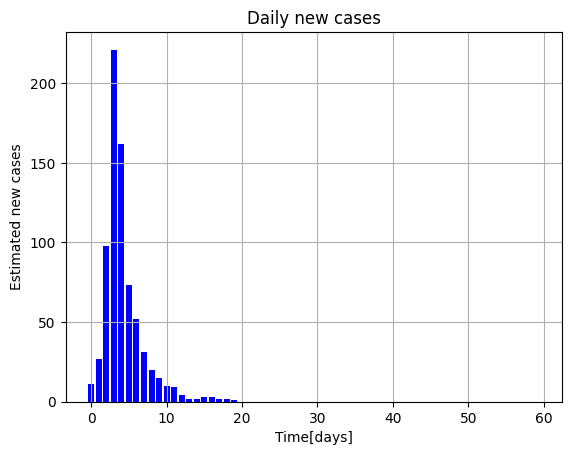

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from column index 1
values = 0.143 * weekly_incidence[:, :, 1].flatten()
values = values.astype(int)

time_axis = range(len(values))

# Plot the values over time as a bar plot
plt.bar(time_axis, values, color="blue")
plt.xlabel("Time[days]")
plt.ylabel("Estimated new cases")
plt.title("Daily new cases")
plt.grid(True)
plt.show()

In [121]:
values.astype(int)

array([ 11,  27,  98, 221, 162,  73,  52,  31,  20,  15,  10,   9,   4,
         2,   2,   3,   3,   2,   2,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0])

In [128]:
np.sum(out.incidence_per_day[:], axis=0)

array([[1159,  806,  358,  811]])

In [ ]:
import pandas as pd

# Create a date range starting from 2015-01-01
start_date = pd.to_datetime("2015-01-01")
dates = pd.date_range(start=start_date, periods=len(values), freq="w")

# Create a DataFrame with dates and values
df = pd.DataFrame({"Date": dates, "Cases": values})

# Save the DataFrame to a CSV file
df.to_csv("D:/weekly_esimated_new_infections.csv", index=False)

# Print the first few rows to verify
print(df.head())

        Date  Cases
0 2015-01-04     11
1 2015-01-11     27
2 2015-01-18     98
3 2015-01-25    221
4 2015-02-01    162


C:\Users\rafiy\AppData\Local\Temp\ipykernel_19796\3746009420.py:5: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(start=start_date, periods=len(values), freq='w')


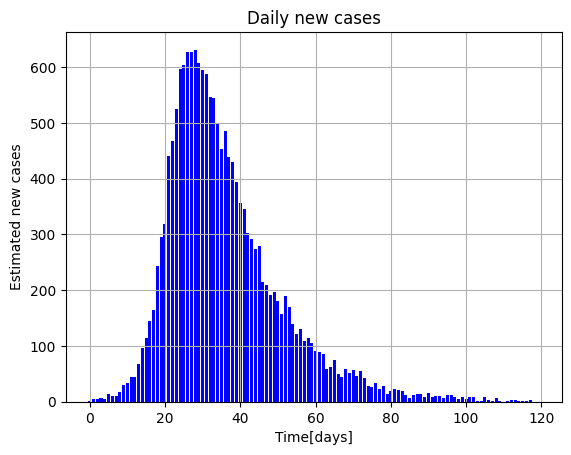

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from column index 1
values = out.incidence[:, :, 1].flatten()

time_axis = range(len(values))

# Plot the values over time as a bar plot
plt.bar(time_axis, values, color="blue")
plt.xlabel("Time[days]")
plt.ylabel("Estimated new cases")
plt.title("Daily new cases")
plt.grid(True)
plt.show()

In [13]:
rng = np.random.default_rng()

sim_data = rng.poisson(values)
sim_data

array([ 0,  0,  2,  2,  1,  2,  2,  5,  4,  5,  5,  7,  3,  6,  9, 10, 12,
        8, 20, 16, 29, 32, 30, 34, 34, 25, 41, 26, 35, 33, 30, 34, 27, 18,
       24, 17, 21, 21, 18, 16, 30, 13,  8, 12, 10,  9,  9,  8, 10,  3,  6,
       11,  2,  8,  3,  4,  3,  2,  4,  9,  2,  4,  6,  5,  3,  5,  3,  3,
        6,  4,  7,  6,  2,  1,  1,  4,  1,  1,  6,  6,  3,  2,  5,  5,  1,
        1,  4,  0,  3,  2,  1,  2,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        3])

In [ ]:
import pandas as pd

# Create a date range starting from 2015-01-01
start_date = pd.to_datetime("2015-01-01")
dates = pd.date_range(start=start_date, periods=len(values))

# Create a DataFrame with dates and values
df = pd.DataFrame({"Date": dates, "Cases": values})

# Save the DataFrame to a CSV file
df.to_csv("./esimated_new_infections.csv", index=False)

# Print the first few rows to verify
print(df.head())

        Date  Cases
0 2015-01-01     34
1 2015-01-02   1060
2 2015-01-03   1990
3 2015-01-04   1986
4 2015-01-05   1934
